In [282]:
import numpy as np
import math as mt
import matplotlib.pyplot as plt
from scipy import stats
import scipy as sc

from mpl_toolkits import mplot3d

# Distribución Gaussiana
Hacemos la función de distribución normal:
\begin{equation}
P(x) = \frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{(x-\mu)^2}{2\sigma^2}}
\end{equation}
con $\sigma = 2$ y $\mu = 70$

In [283]:
n  = 100000
x = np.linspace(60,80,n)
mu  = 70
sigma = 2
gauss = (1/(sigma*np.sqrt(2*np.pi)))*(np.exp(-np.divide(np.power((x-mu),2),2*(sigma)**2)))

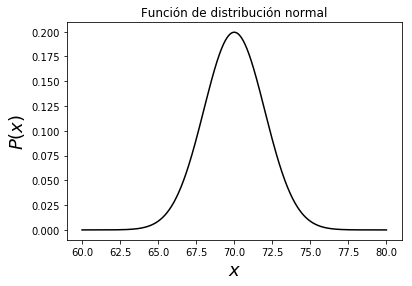

In [284]:
plt.plot(x,gauss,'k')
plt.title("Función de distribución normal")
plt.xlabel("$x$",fontsize  =18) 
plt.ylabel("$P(x)$",fontsize  =18);

Podemos encontrar la función de distribución acumulada de la forma:
\begin{equation}
F(x) = \frac{1}{2} \left[1 + efr\left(\frac{x-\mu}{\sigma\sqrt{2}}\right) \right]
\end{equation}
donde $efr(x)$ es la funcion error

In [285]:
gauss_ac=0.5*(1+sc.special.erf((x-mu)/(sigma*mt.sqrt(2))))

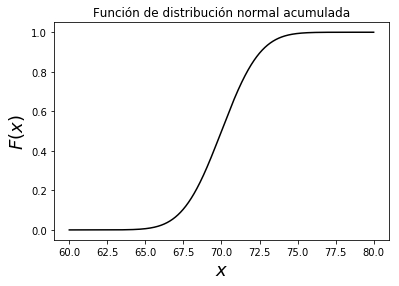

In [286]:
plt.plot(x,gauss_ac,'k')
plt.title("Función de distribución normal acumulada")
plt.xlabel("$x$",fontsize  =18) 
plt.ylabel("$F(x)$",fontsize  =18);

In [287]:
F = np.random.random(10000)
X = (sigma*pow(2,0.5)*sc.special.erfinv(2*F-1)+mu)

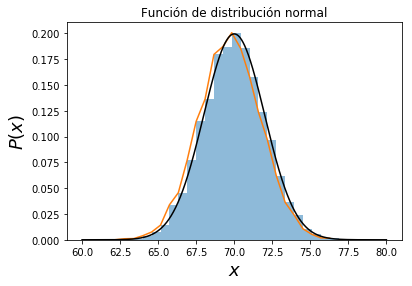

In [288]:
bins = 25
gau = plt.hist(X,bins = bins,density=True,alpha = 0.5)
plt.plot(gau[1][:bins],gau[0])
plt.plot(x,gauss,'k')
plt.title("Función de distribución normal")
plt.xlabel("$x$",fontsize  =18) 
plt.ylabel("$P(x)$",fontsize  =18);

# Función de distribución de Poisson:

\begin{equation}
f(k,\lambda) = \frac{e^{-\lambda}\lambda^{k}}{k!}
\end{equation}

In [289]:
def poisson(lam,k):
    return np.divide(np.power(np.e,-lam)*np.power(lam,k),mt.factorial(k))

In [290]:
lam = np.linspace(0,20,10000)
k = [1,4,10]
pois = np.array([poisson(lam,k[0]),poisson(lam,k[1]),poisson(lam,k[2])])

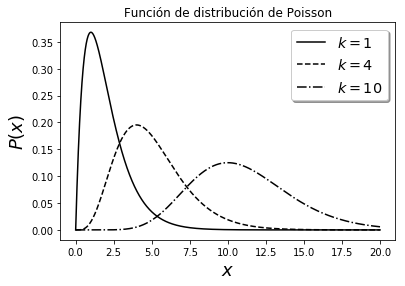

In [291]:
plt.plot(lam,pois[0],'k-',label='$k={0}$'.format(k[0]))
plt.plot(lam,pois[1],'k--',label='$k={0}$'.format(k[1]))
plt.plot(lam,pois[2],'k-.',label='$k={0}$'.format(k[2]))
plt.title("Función de distribución de Poisson")
plt.xlabel("$x$",fontsize  =18) 
plt.ylabel("$P(x)$",fontsize  =18)
plt.legend(loc='upper right', shadow=True, fontsize='x-large');

Función de distribución acumulada

\begin{equation}
F(k,\lambda) = e^{-\lambda} \sum_{x=0}^{k} \frac{\lambda^{x}}{x!}
\end{equation}

In [292]:
def poisson_ac(lam,k):
    fact = sc.vectorize(sc.math.factorial, otypes='O')
    x = np.linspace(0,k,k+1)
    s = np.zeros_like(lam)
    for i in range(len(x)):
        s = (np.divide(np.power(lam,x[i]),mt.factorial(x[i]))) + s
    return s*np.exp(-lam)

In [293]:
pois_ac = np.array([poisson_ac(lam,k[0]),poisson_ac(lam,k[1]),poisson_ac(lam,k[2])])

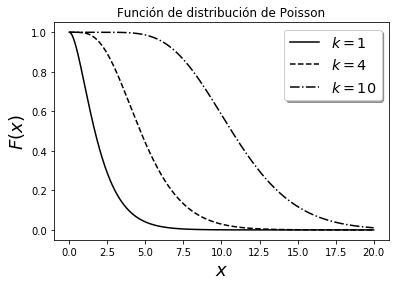

In [294]:
plt.plot(lam,pois_ac[0],'k-',label='$k={0}$'.format(k[0]))
plt.plot(lam,pois_ac[1],'k--',label='$k={0}$'.format(k[1]))
plt.plot(lam,pois_ac[2],'k-.',label='$k={0}$'.format(k[2]))
plt.title("Función de distribución de Poisson")
plt.xlabel("$x$",fontsize  =18) 
plt.ylabel("$F(x)$",fontsize  =18)
plt.legend(loc='upper right', shadow=True, fontsize='x-large');

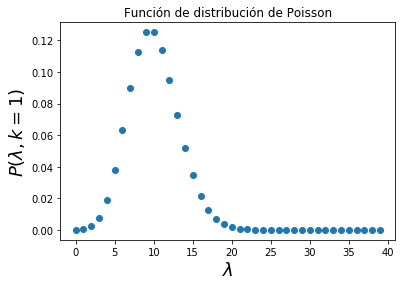

In [295]:
lam_2 = np.linspace(0,39,40)
pois_2 = sc.stats.poisson.pmf(lam_2, k[2])

plt.plot(lam_2,pois_2,'o')
plt.xlabel('$\lambda$',fontsize  =18)
plt.ylabel('$P(\lambda,k = 1)$',fontsize  =18)
plt.title("Función de distribución de Poisson");

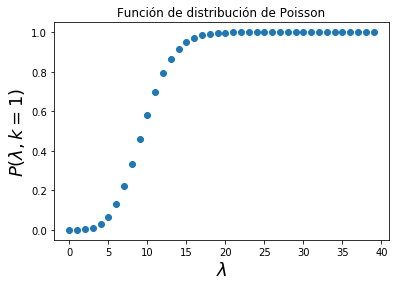

In [296]:
pois_2_ac = sc.stats.poisson.cdf(lam_2, k[2])

plt.plot(lam_2,pois_2_ac,'o')
plt.xlabel('$\lambda$',fontsize  =18)
plt.ylabel('$P(\lambda,k = 1)$',fontsize  =18)
plt.title("Función de distribución de Poisson");

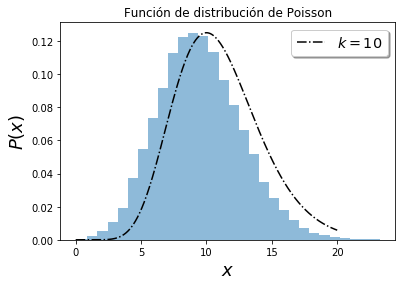

In [297]:
pois_ac_in = sc.interpolate.interp1d(pois_2_ac, lam_2)
pois_r = np.linspace(0.0001,0.9999,10000)
lam_r = pois_ac_in(pois_r)

plt.hist(lam_r, bins = 30,density=True,alpha = 0.5)
plt.plot(lam,pois[2],'k-.',label='$k={0}$'.format(k[2]))
plt.title("Función de distribución de Poisson")
plt.xlabel("$x$",fontsize  =18) 
plt.ylabel("$P(x)$",fontsize  =18)
plt.legend(loc='upper right', shadow=True, fontsize='x-large');

# Distribución Beta

\begin{equation}
f(x) = \frac{\Gamma(\alpha + \beta)}{\Gamma(\alpha)\Gamma(\beta)}x^{\alpha - 1}(1-x)^{\beta -1}
\end{equation}

para $0<x<1$

In [298]:
def gamma(x,a,b):
    gam = sc.special.gamma(a+b)/(sc.special.gamma(a)*sc.special.gamma(b))
    return gam*(np.power(x,a-1))*(np.power(1-x,b-1))

In [299]:
x_b = np.linspace(0.001,0.999,1000)
beta = [0.5,1,3,2,5]
alpha = [beta[0],5,1,2,2]
gam = [gamma(x_b,alpha[0],beta[0]),gamma(x_b,alpha[1],beta[1]),gamma(x_b,alpha[2],beta[2]),
       gamma(x_b,alpha[3],beta[3]),gamma(x_b,alpha[4],beta[4])]

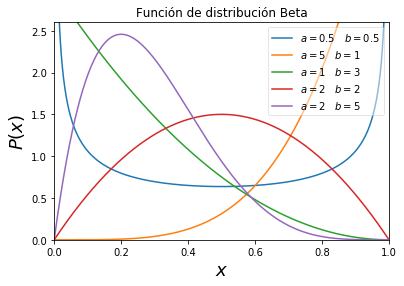

In [300]:
for i in range(len(gam)):
    plt.plot(x_b,gam[i],label='$a={0}\quadb ={1} $'.format(alpha[i],beta[i]))
plt.title("Función de distribución Beta")
plt.xlabel("$x$",fontsize  =18) 
plt.ylabel("$P(x)$",fontsize  =18)
plt.xlim(0,1)
plt.ylim(0,2.6)
plt.legend(loc='upper right', fancybox=True,framealpha=0.5);

Función de distribución acumulada:

\begin{equation}
F(x) = \frac{\Gamma(\alpha + \beta)}{\Gamma(\alpha)\Gamma(\beta)} \int_0^x t^{\alpha -1}(1-t)^{\beta-1}dt
\end{equation}

In [301]:
def arg_beta(t,a,b):
    return (t**(a-1))*(1-t)**(b-1)

In [302]:
def gamma_ac(x,a,b):
    gam = sc.special.gamma(a+b)/(sc.special.gamma(a)*sc.special.gamma(b))
    q = []
    for i in range(len(x)):
        q.append(sc.integrate.quad(arg_beta,0,x[i],args=(a,b))[0])
    q = np.array(q)
    return gam*q

In [303]:
gam_ac = [gamma_ac(x_b,alpha[0],beta[0]),gamma_ac(x_b,alpha[1],beta[1]),gamma_ac(x_b,alpha[2],beta[2]),
       gamma_ac(x_b,alpha[3],beta[3]),gamma_ac(x_b,alpha[4],beta[4])]

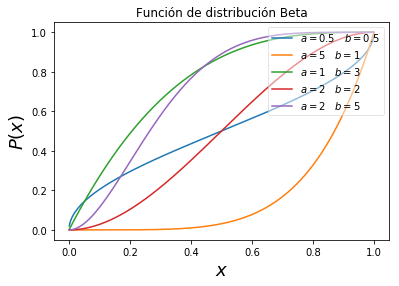

In [304]:
for i in range(len(gam)):
    plt.plot(x_b,gam_ac[i],label='$a={0}\quadb ={1} $'.format(alpha[i],beta[i]))
plt.title("Función de distribución Beta")
plt.xlabel("$x$",fontsize  =18) 
plt.ylabel("$P(x)$",fontsize  =18)
plt.legend(loc='upper right', fancybox=True,framealpha=0.5);

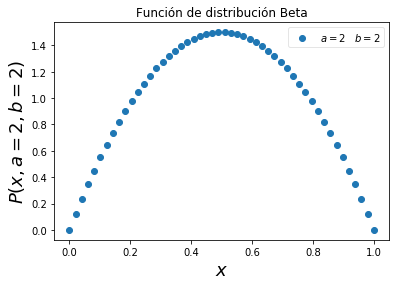

In [305]:
x_b_2 = np.linspace(0, 1, 50)
gam_2 = sc.stats.beta.pdf(x_b_2, 2, 2)

plt.plot(x_b_2,gam_2,'o',label='$a=2\quadb =2$')
plt.title("Función de distribución Beta")
plt.xlabel("$x$",fontsize  =18) 
plt.ylabel("$P(x,a=2,b=2)$",fontsize  =18)
plt.legend(loc='upper right', fancybox=True,framealpha=0.5);

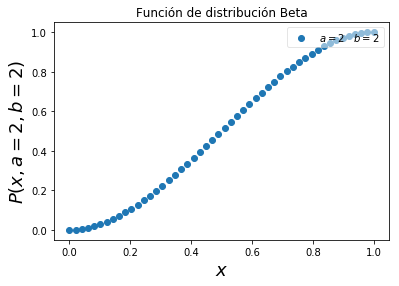

In [306]:
gam_ac_2 = sc.stats.beta.cdf(x_b_2, 2, 2)

plt.plot(x_b_2,gam_ac_2,'o',label='$a=2\quadb =2$')
plt.title("Función de distribución Beta")
plt.xlabel("$x$",fontsize  =18) 
plt.ylabel("$P(x,a=2,b=2)$",fontsize  =18)
plt.legend(loc='upper right', fancybox=True,framealpha=0.5);

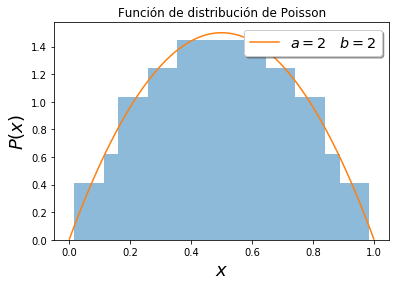

In [307]:
gam_ac_in = sc.interpolate.interp1d(gam_ac_2, x_b_2)
gam_r = np.linspace(0.001,0.999,100)
x_b_r = gam_ac_in(gam_r)

plt.hist(x_b_r, bins = 20,density=True,alpha = 0.5)
plt.plot(x_b,gam[3],label='$a={0}\quadb ={1} $'.format(alpha[3],beta[3]))
plt.title("Función de distribución de Poisson")
plt.xlabel("$x$",fontsize  =18) 
plt.ylabel("$P(x)$",fontsize  =18)
plt.legend(loc='upper right', shadow=True, fontsize='x-large');

# Distribución Binomial

\begin{equation}
f(x|B_{n,p}) = \frac{n!}{(n-x)!x!} p^{x}(1-p)^{n-x}
\end{equation}

donde:

$n = 1,2,3,...$

$0<p<1$

$x = 1,2,3,...,n$

In [308]:
def binomial(p,n):
    x = np.linspace(1,n_bi,n_bi)
    B = []
    for i in range(len(x)):
        B.append(mt.factorial(n)/((mt.factorial(n-x[i]))*(mt.factorial(x[i]))))
    B = np.array(B) 
    return x, B*(p**x)*np.power(1-p,n-x)  

In [309]:
n_bi = 20
p_bi = 0.75
x_bi, binom = binomial(p_bi,n_bi)

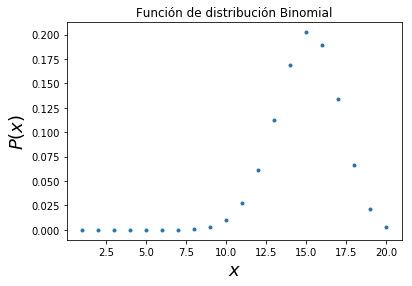

In [310]:
plt.plot(x_bi,binom,'.')
plt.title("Función de distribución Binomial")
plt.xlabel("$x$",fontsize  =18) 
plt.ylabel("$P(x)$",fontsize  =18);

Hacemos la función de distribución acumulada

In [311]:
def binomial_ac(p,n):
    x = np.linspace(1,n_bi,n_bi)
    B = []
    for i in range(len(x)):
        B.append(mt.factorial(n)/((mt.factorial(n-x[i]))*(mt.factorial(x[i]))))
    B = np.array(B) 
    F = [0]
    for i in range(len(B)):
        F.append((B[i]*(p**x[i])*np.power(1-p,n-x[i]))+F[i])
    return x,F[1:]

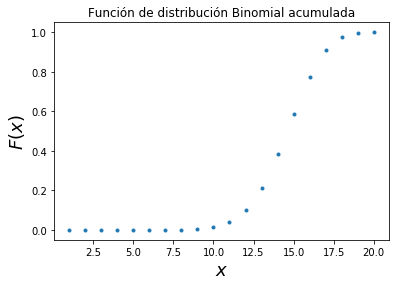

In [312]:
x_bi_ac, binom_ac = binomial_ac(p_bi,n_bi)

plt.plot(x_bi_ac,binom_ac,'.')
plt.title("Función de distribución Binomial acumulada")
plt.xlabel("$x$",fontsize  =18) 
plt.ylabel("$F(x)$",fontsize  =18);

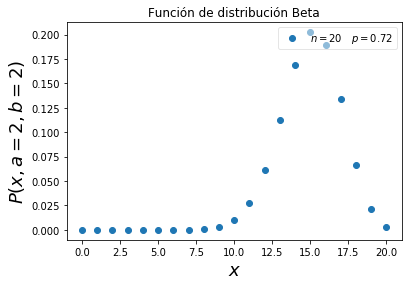

In [313]:
x_bi_2 = np.linspace(0,20,21)
bino = sc.stats.binom.pmf(x_bi_2, n_bi, p_bi)

plt.plot(x_bi_2,bino,'o',label='$n=20\quadp =0.72$')
plt.title("Función de distribución Beta")
plt.xlabel("$x$",fontsize  =18) 
plt.ylabel("$P(x,a=2,b=2)$",fontsize  =18)
plt.legend(loc='upper right', fancybox=True,framealpha=0.5);

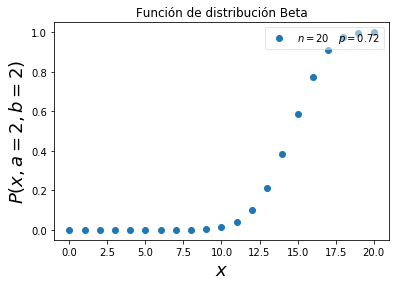

In [314]:
binom_ac = sc.stats.binom.cdf(x_bi_2, n_bi, p_bi)

plt.plot(x_bi_2,binom_ac,'o',label='$n=20\quadp =0.72$')
plt.title("Función de distribución Beta")
plt.xlabel("$x$",fontsize  =18) 
plt.ylabel("$P(x,a=2,b=2)$",fontsize  =18)
plt.legend(loc='upper right', fancybox=True,framealpha=0.5);

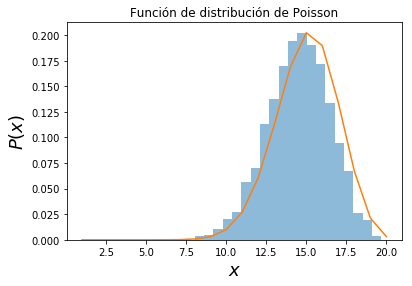

In [315]:
binom_ac_in = sc.interpolate.interp1d(binom_ac, x_bi_2)
binom_r = np.linspace(0.001,0.999,1000)
x_bi_r = binom_ac_in(binom_r)

plt.hist(x_bi_r, bins = 20,density=True,alpha = 0.5)
plt.plot(x_bi,binom,'-')
plt.title("Función de distribución de Poisson")
plt.xlabel("$x$",fontsize  =18) 
plt.ylabel("$P(x)$",fontsize  =18);

# Distribución $\chi^2$ 

\begin{equation}
f(x|B_{n,p}) = \frac{1}{2^{k/2}\Gamma(k/2)}x^{(k/2)-1}e^{-x/2}
\end{equation}

para:

$x>0$ y $k>0$

In [316]:
def chi(x,k):
    p = 1/(mt.pow(2,k/2)*sc.special.gamma(k/2))
    q = np.power(x,(k/2)-1)*np.exp(-x/2)
    return p*q

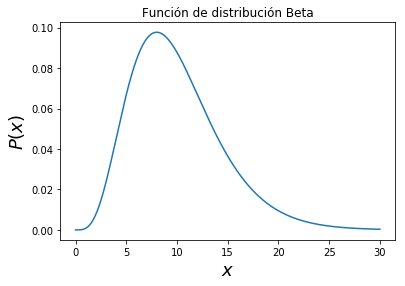

In [317]:
k  = 10
x_chi = np.linspace(0.001,30.0001,10000)
p_chi = chi(x_chi,k)

plt.plot(x_chi,p_chi)
plt.title("Función de distribución Beta")
plt.xlabel("$x$",fontsize  =18) 
plt.ylabel("$P(x)$",fontsize  =18);

Función de distribución acumulada para $\chi^2$

\begin{equation}
F_k(x) = \frac{1}{2\Gamma (k/2)}\int_0^x \left( \frac{x'}{2}\right)^{(k/2)-1} e^{-x'/2}dx'
\end{equation}

In [318]:
def arrg_chi(xp,k):
    return (xp/2)**((k/2)-1) * mt.exp(-xp/2)
    

In [319]:
def chi_ac(x,k):
    p = 1/(2*sc.special.gamma(k/2))
    q = []
    for i in range(len(x)):
        q.append(p*sc.integrate.quad(arrg_chi,0,x[i],args=(k))[0])
    return q

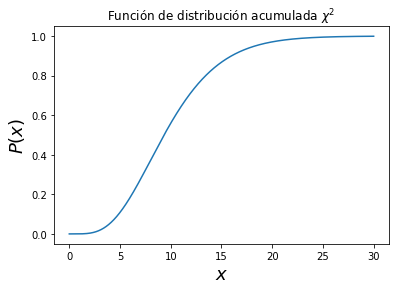

In [320]:
p_chi_ac = chi_ac(x_chi,k)

plt.plot(x_chi,p_chi_ac)
plt.title("Función de distribución acumulada $\chi^2$")
plt.xlabel("$x$",fontsize  =18) 
plt.ylabel("$P(x)$",fontsize  =18);

In [321]:
k  = 10
x_chi_2 = np.linspace(0,30,31)
p_chi_2 = sc.stats.chi2.pdf(x_chi_2,k)

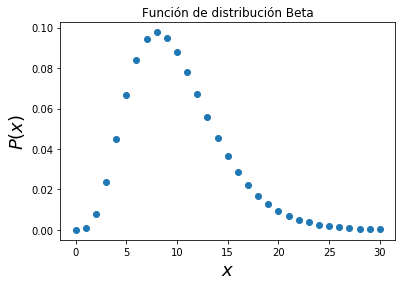

In [322]:
plt.plot(x_chi_2,p_chi_2,'o')
plt.title("Función de distribución Beta")
plt.xlabel("$x$",fontsize  =18) 
plt.ylabel("$P(x)$",fontsize  =18);

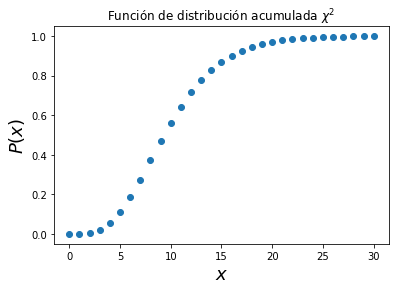

In [323]:
p_chi_ac_2 = sc.stats.chi2.cdf(x_chi_2,k)

plt.plot(x_chi_2,p_chi_ac_2,'o')
plt.title("Función de distribución acumulada $\chi^2$")
plt.xlabel("$x$",fontsize  =18) 
plt.ylabel("$P(x)$",fontsize  =18);

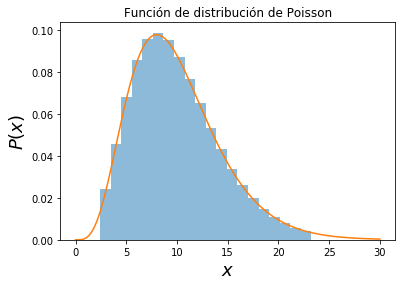

In [324]:
p_chi_in = sc.interpolate.interp1d(p_chi_ac_2, x_chi_2)
p_chi_r = np.linspace(0.01,0.99,10000)

x_chi_r = p_chi_in(p_chi_r)

plt.hist(x_chi_r, bins = 20,density=True,alpha = 0.5)
plt.plot(x_chi,p_chi,'-')
plt.title("Función de distribución de Poisson")
plt.xlabel("$x$",fontsize  =18) 
plt.ylabel("$P(x)$",fontsize  =18);